# Introduction to Data Analytics and Pandas

## What is Data Analytics?

Data analytics is the process of examining, cleaning, transforming, and interpreting data to discover useful information, draw conclusions, and support decision-making. It involves various techniques, tools, and processes to extract insights from raw data.

## Introduction to Pandas

Pandas is a powerful Python library for data manipulation and analysis. It provides data structures like DataFrames and Series, which allow you to work with structured data efficiently. Pandas is widely used in data science and analytics for tasks such as:

- Loading data from various sources (CSV, Excel, databases, etc.)
- Cleaning and preprocessing data
- Performing data transformations
- Analyzing and summarizing data
- Merging and joining datasets

Let's start by importing pandas and loading some example datasets.


install needed libraries

```bash
python3 -m pip install pandas matplotlib seaborn
```

```python
```

In [10]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Titanic dataset
titanic_df = pd.read_csv("titanic.csv")

In [ ]:
# Display the first few rows of the dataset
titanic_df.head()

In [ ]:
# Get basic information about the dataset
titanic_df.info()

In [ ]:
# Summary statistics of numerical columns
titanic_df.describe()

In [ ]:
# Example 1: Survival rate by passenger class
survival_rate = titanic_df.groupby("Pclass")["Survived"].mean()
print("Survival rate by passenger class:")
print(survival_rate)

In [ ]:
# Visualize survival rate by passenger class
plt.figure(figsize=(10, 6))
survival_rate.plot(kind="bar")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
# Visualize survival rate by passenger class using seaborn

sns.barplot(x="Pclass", y="Survived", data=titanic_df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

In [ ]:
# Example 2: Age distribution of passengers
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x="Age", bins=16, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Reading Data from Online Sources
We can also load data directly from online sources. Let's read the World Population data from Worldometer as an example.



In [58]:
# Read World Population data from Worldometer
url = "https://www.worldometers.info/world-population/population-by-country/"
population_data = pd.read_html(url)[0]

In [ ]:
# Display the first few rows of the data
population_data.head(10)

In [ ]:
population_data.iloc[0:3]

In [ ]:
population_data.sample(5)

In [31]:
# sort the data by countries
population_data.sort_values(by="Country (or dependency)", inplace=True)

In [ ]:
population_data.head(15)

In [ ]:
# Example 3: get the servivors only
servivors_df = titanic_df[titanic_df["Survived"] == 1]
servivors_df.head()

In [ ]:
# plot the age distribution of servivors
sns.histplot(data=servivors_df, x="Age", bins=40, kde=True)
plt.title("Age Distribution of Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [ ]:
died_df = titanic_df[titanic_df["Survived"] == 0]
died_df.head()

In [ ]:
# plot the age distribution of servivors
sns.histplot(data=died_df, x="Age", bins=40, kde=True)
plt.title("Age Distribution of died")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Exercises
Now it's your turn! Try to complete the following exercises to practice your skills.

- Survival Rate by Gender and Passenger Class: Use the Titanic dataset to create a bar chart that shows the survival rate for each combination of gender and passenger class (Pclass).

- Population Growth: Create a bar plot showing the yearly population growth for the top 10 countries from the World Population dataset. You can use the Yearly Change column.

In [51]:
titanic_df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.190227
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

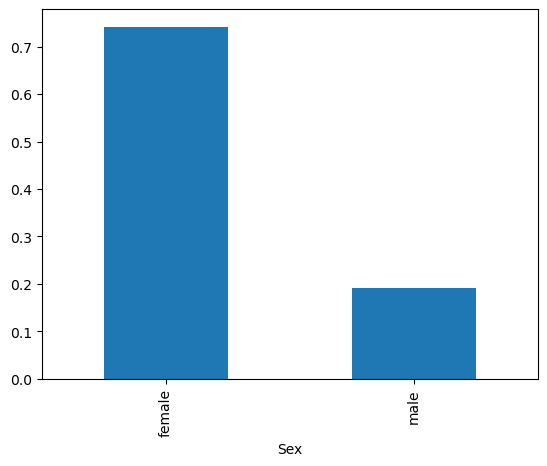

In [52]:
# plot survival rate
sex_survival_rate = titanic_df.groupby("Sex")["Survived"].mean()

sex_survival_rate.plot(kind="bar")

<Axes: xlabel='Pclass,Sex'>

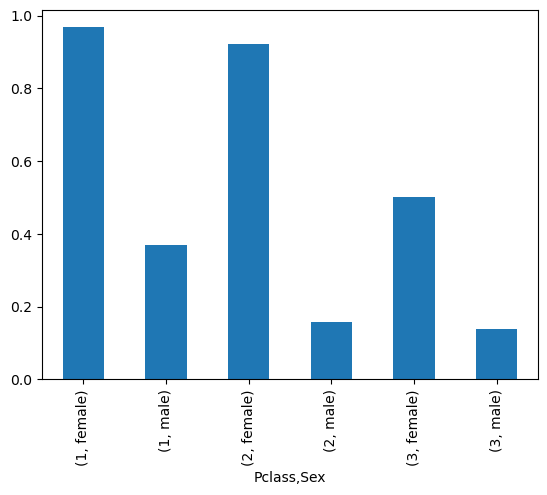

In [56]:
servivors_rate_df = titanic_df.groupby(["Pclass", "Sex"])["Survived"].mean()

servivors_rate_df.plot(kind="bar")

<Axes: xlabel='Pclass,Sex'>

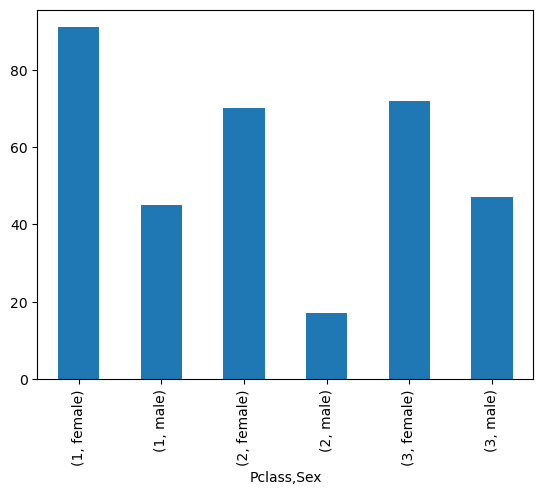

In [57]:
servivors_count_df = titanic_df.groupby(["Pclass", "Sex"])["Survived"].sum()

servivors_count_df.plot(kind="bar")

In [59]:
population_data.head()

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1450935791,0.89 %,12866195,488,2973190,-630830,2.0,28,37 %,17.78 %
1,2,China,1419321278,-0.23 %,-3263655,151,9388211,-318992,1.0,40,66 %,17.39 %
2,3,United States,345426571,0.57 %,1949236,38,9147420,1286132,1.6,38,82 %,4.23 %
3,4,Indonesia,283487931,0.82 %,2297864,156,1811570,-38469,2.1,30,59 %,3.47 %
4,5,Pakistan,251269164,1.52 %,3764669,326,770880,-1401173,3.5,20,34 %,3.08 %


/tmp/ipykernel_8840/243199171.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Yearly Change", data=top_10_growth, palette="coolwarm")


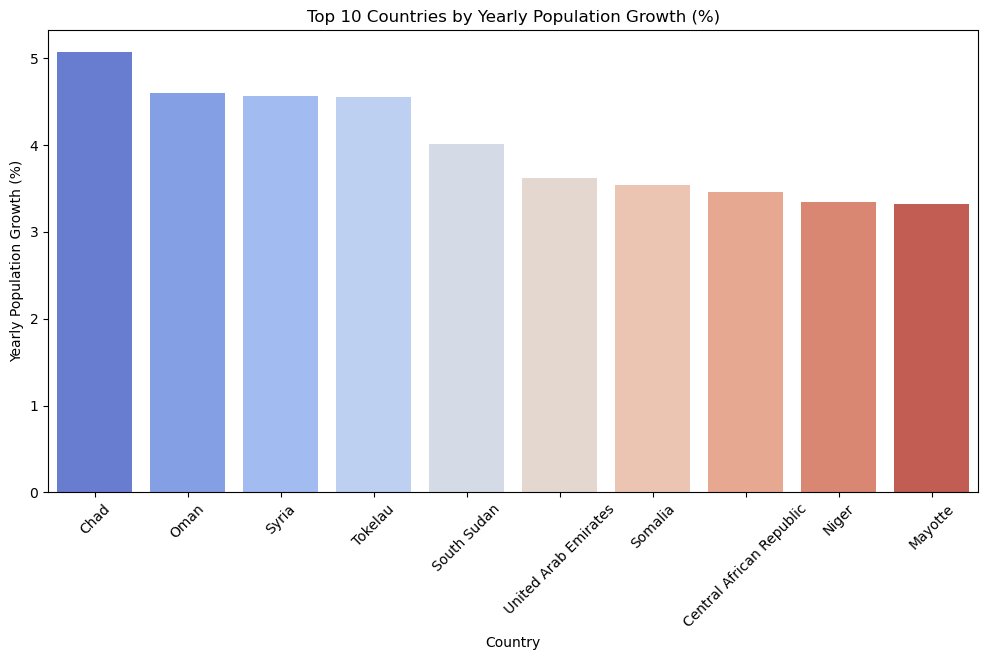

In [82]:
# Read the World Population data from Worldometer
url = "https://www.worldometers.info/world-population/population-by-country/"
population_data = pd.read_html(url)[0]

# Rename columns for easier access
population_data.columns = [
    "#",
    "Country",
    "Population",
    "Yearly Change",
    "Net Change",
    "Density (P/Km²)",
    "Land Area (Km²)",
    "Migrants (net)",
    "Fertility Rate",
    "Median Age",
    "Urban Population",
    "World Share",
]

# Convert the 'Yearly Change' to a numeric value (removing the percentage sign)
population_data["Yearly Change"] = (
    population_data["Yearly Change"].str.rstrip("%").astype(float)
)

# Sort the dataset by 'Yearly Change' to get the top 10 countries by population growth
top_10_growth = population_data.sort_values(by="Yearly Change", ascending=False).head(
    10
)

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="Yearly Change", data=top_10_growth, palette="coolwarm")

# Add labels and title
plt.title("Top 10 Countries by Yearly Population Growth (%)")
plt.xlabel("Country")
plt.ylabel("Yearly Population Growth (%)")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Exercise: Fare vs. Age for Each Passenger Class
Goal: Create a scatter plot that shows the relationship between passengers' age and fare they paid, color-coded by passenger class (Pclass).

Steps:
Load the Titanic dataset.
Create a scatter plot using seaborn’s scatterplot(), with Age on the x-axis, Fare on the y-axis, and the points color-coded by Pclass.